## <center> Decision Tree Regression (No capped dataset)
#### <center> By: $\color{red}{\text{Amirehsan Ghasemi}}$

### Importing Modules

In [1]:
#....> Importing the base libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


#....> AI/ML modules
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#....> Preventing warnings
import warnings      #....> Prevent from printing the warning of plotting
warnings.simplefilter(action="ignore", category=FutureWarning)

#....................................................................................................
#....................................................................................................
print('Modules are imported')  #....> If prints, this means that the modules are imported correctly

Modules are imported


### Read in all our data

In [2]:
df = pd.read_csv('housing.csv')  #....> Importing dataframe
rows,columns = df.shape
print("Dataframe number of rows: ", rows)
print("Dataframe number of columns: ", columns)

Dataframe number of rows:  20640
Dataframe number of columns:  10


### Checking the data structure

In [3]:
df.head(n=5)     #....> Show the first 5 rows (each row: one district)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#....> Remove capped values of prices USD 500000
df=df[df['median_house_value'] < 490000]
df.head(n=5)  #....> Show the first 5 rows (each row: one district)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Notice: All features are numerical, except the $\color{red}{\text{ocean_proximity}}$. Its type is object and its text feature (Categorical feature)

#### It might be interesting to add the possibly helpful attributes combinations and study their effect on modeling. So:

In [5]:
df["rooms_per_household"]      = df["total_rooms"]/df["households"]
df["bedrooms_per_room"]        = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

df.head(n=5)    #....> Show the first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Handling categorical feature (ocean_proximity)

#### First, we have to explore this categorical feature

In [6]:
df["ocean_proximity"].value_counts()    #....> Return a Series containing counts of unique values

<1H OCEAN     8571
INLAND        6523
NEAR OCEAN    2428
NEAR BAY      2081
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean. This gradient is chosen for the better and easier interpretation of models results (feature importances)

In [7]:
df.loc[df['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 4
df.loc[df['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity']   = 3
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity']  = 2
df.loc[df['ocean_proximity'] == 'INLAND', 'ocean_proximity']     = 1
df.loc[df['ocean_proximity'] == 'ISLAND', 'ocean_proximity']     = 0

df     #....> Show the dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


### Splitting the dataset

#### Now the data will be splitted in train and test set to avoid the data leakage and bias during the further preprocessing steps, which include cleaning the missing values and feature scaling.

In [8]:
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data:", len(train_set1))
print("Testing Data:", len(test_set1))

Training Data: 15686
Testing Data: 3922


### Data cleaning (Training set and Testing set)

#### Check if there are any missing values (NaN or None)

In [9]:
#....> For Training set
missing_values_count = train_set1.isnull().sum()
missing_values_count[:]

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              146
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           146
population_per_household      0
dtype: int64

In [10]:
#....> For Testing set
missing_values_count = test_set1.isnull().sum()
missing_values_count[:]

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms              54
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity              0
rooms_per_household          0
bedrooms_per_room           54
population_per_household     0
dtype: int64

### It's helpful to see what percentage of the values in our dataset were missing. It gives us a better sense of the scale of this problem

In [11]:
#....> Defining a function to find the percentage of the values in our dataset were missing
def finding_percentage(df):
    total_cells     = np.product(df.shape)
    total_missing   = missing_values_count.sum()
    percent_missing = (total_missing/total_cells)*100
    return percent_missing

In [12]:
#....> Calling the finding_percange functtion
print('Percent of data that is missing in Training set:', finding_percentage(train_set1))
print('Percent of data that is missing in Testing set:', finding_percentage(test_set1))

Percent of data that is missing in Training set: 0.052962465304681294
Percent of data that is missing in Testing set: 0.21182285333228731


### Replacing NAN with Imputer (median) using Scikit-learn

In [13]:
#....> Training Set
imputer = SimpleImputer(strategy = "median") #....> Using medain
housing_numerical_attributes = train_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X1 = imputer.transform(housing_numerical_attributes)

In [14]:
#....> Testing Set
imputer = SimpleImputer(strategy = "median")  #....> Using medain
housing_numerical_attributes1 = test_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X2 = imputer.transform(housing_numerical_attributes1)

#### For Both Training and Testing sets the NAN values are replaced with medain
#### Put back the ocean proximity in train and test sets:

In [15]:
#....> Training Set
train_set = pd.DataFrame(X1, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)
train_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
train_set    #....> Show the Training set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,-115.57,32.79,50.0,1291.0,277.0,864.0,274.0,1.6667,68100.0,1,4.711679,0.214562,3.153285
17659,-121.88,37.28,33.0,2951.0,529.0,1288.0,521.0,4.1554,313100.0,2,5.664107,0.179261,2.472169
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887,264500.0,2,6.400000,0.169231,3.200000
17544,-121.87,37.34,52.0,1170.0,215.0,604.0,207.0,2.6667,325900.0,2,5.652174,0.183761,2.917874
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,318900.0,2,5.526448,0.213765,2.486146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-118.00,33.77,28.0,2401.0,503.0,1155.0,456.0,3.5139,211700.0,2,5.265351,0.209496,2.532895
18228,-122.09,37.41,18.0,1476.0,473.0,838.0,415.0,3.5750,274000.0,3,3.556627,0.320461,2.019277
5425,-118.42,34.02,34.0,2243.0,444.0,973.0,413.0,4.9676,414100.0,2,5.430993,0.197949,2.355932
12799,-121.45,38.61,32.0,2436.0,612.0,1509.0,618.0,1.0424,81400.0,1,3.941748,0.251232,2.441748


In [16]:
#....> Testing Set
test_set = pd.DataFrame(X2, columns = housing_numerical_attributes1.columns, index = housing_numerical_attributes1.index)

test_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
test_set  #....> Show the Testing set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,182900.0,2,5.328413,0.225762,3.830258
10317,-117.82,33.84,25.0,1788.0,203.0,676.0,217.0,10.1299,454300.0,2,8.239631,0.113535,3.115207
5086,-118.28,33.98,47.0,865.0,193.0,782.0,217.0,2.2411,93000.0,2,3.986175,0.223121,3.603687
7988,-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,169800.0,2,4.322115,0.239711,2.903846
14480,-117.25,32.82,19.0,5255.0,762.0,1773.0,725.0,7.8013,474000.0,4,7.248276,0.145005,2.445517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-122.29,37.90,49.0,1283.0,238.0,576.0,236.0,3.3333,276800.0,3,5.436441,0.185503,2.440678
11924,-117.39,33.95,35.0,1599.0,284.0,721.0,287.0,4.1250,120700.0,1,5.571429,0.177611,2.512195
13047,-121.28,38.55,35.0,7088.0,1279.0,4885.0,1272.0,2.6981,112500.0,1,5.572327,0.180446,3.840409
10331,-117.77,33.84,5.0,4380.0,715.0,1913.0,741.0,6.7274,266400.0,2,5.910931,0.163242,2.581646


### Feature Scaling (Standardization)

In [17]:
train_set_without_target = train_set.drop("median_house_value", axis=1) #....> drop labels for training set 
train_set_without_target    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,-115.57,32.79,50.0,1291.0,277.0,864.0,274.0,1.6667,1,4.711679,0.214562,3.153285
17659,-121.88,37.28,33.0,2951.0,529.0,1288.0,521.0,4.1554,2,5.664107,0.179261,2.472169
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887,2,6.400000,0.169231,3.200000
17544,-121.87,37.34,52.0,1170.0,215.0,604.0,207.0,2.6667,2,5.652174,0.183761,2.917874
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,2,5.526448,0.213765,2.486146
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-118.00,33.77,28.0,2401.0,503.0,1155.0,456.0,3.5139,2,5.265351,0.209496,2.532895
18228,-122.09,37.41,18.0,1476.0,473.0,838.0,415.0,3.5750,3,3.556627,0.320461,2.019277
5425,-118.42,34.02,34.0,2243.0,444.0,973.0,413.0,4.9676,2,5.430993,0.197949,2.355932
12799,-121.45,38.61,32.0,2436.0,612.0,1509.0,618.0,1.0424,1,3.941748,0.251232,2.441748


In [18]:
test_set_without_target = test_set.drop("median_house_value", axis=1) #....> drop labels for testing set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,2,5.328413,0.225762,3.830258
10317,-117.82,33.84,25.0,1788.0,203.0,676.0,217.0,10.1299,2,8.239631,0.113535,3.115207
5086,-118.28,33.98,47.0,865.0,193.0,782.0,217.0,2.2411,2,3.986175,0.223121,3.603687
7988,-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,2,4.322115,0.239711,2.903846
14480,-117.25,32.82,19.0,5255.0,762.0,1773.0,725.0,7.8013,4,7.248276,0.145005,2.445517
...,...,...,...,...,...,...,...,...,...,...,...,...
385,-122.29,37.90,49.0,1283.0,238.0,576.0,236.0,3.3333,3,5.436441,0.185503,2.440678
11924,-117.39,33.95,35.0,1599.0,284.0,721.0,287.0,4.1250,1,5.571429,0.177611,2.512195
13047,-121.28,38.55,35.0,7088.0,1279.0,4885.0,1272.0,2.6981,1,5.572327,0.180446,3.840409
10331,-117.77,33.84,5.0,4380.0,715.0,1913.0,741.0,6.7274,2,5.910931,0.163242,2.581646


In [19]:
# Creating pandas series full of zeros to store the standard deviation and the mean from the training set.
std_dev_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")
mean_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")

# Getting the values for the mean and standard deviation from the training dataset.
for col in train_set_without_target.columns:
    std_dev_tr[col]= train_set_without_target[col].std()
    mean_tr[col]= train_set_without_target[col].mean()
    # Changing the training data so it is normalized with the mean and standard deviation from the training set.
    train_set_without_target[col]=(train_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

for col in test_set_without_target.columns:
    # Changing the testing data so it is normalized with the mean and standard deviation from the training set.
    test_set_without_target[col]=(test_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

In [20]:
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074


In [21]:
train_set_without_target.insert(12,"median_house_value",train_set["median_house_value"]) #Put back the target values for train set
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533,68100.0
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483,313100.0
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512,264500.0
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519,325900.0
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292,318900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310,211700.0
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059,274000.0
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384,414100.0
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074,81400.0


In [22]:
train=train_set_without_target
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533,68100.0
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483,313100.0
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512,264500.0
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519,325900.0
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292,318900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310,211700.0
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059,274000.0
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384,414100.0
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074,81400.0


In [23]:
test_set_without_target.insert(12,"median_house_value",test_set["median_house_value"]) #Put back the target values for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195,182900.0
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289,454300.0
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896,93000.0
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714,169800.0
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.04358,0.874967,-1.230914,-0.056753,474000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.618607,-0.719536,-0.775354,-0.695433,-0.212608,1.010828,0.035831,-0.517495,-0.057165,276800.0
11924,1.078627,-0.787381,0.536698,-0.471916,-0.609205,-0.645133,-0.561436,0.295372,-1.054676,0.098349,-0.656517,-0.051074,120700.0
13047,-0.863198,1.351076,0.536698,2.076147,1.777292,3.094466,2.026542,-0.620174,-1.054676,0.098766,-0.606578,0.062060,112500.0
10331,0.888937,-0.838518,-1.866684,0.819060,0.424544,0.425377,0.631398,1.965157,-0.021924,0.255587,-0.909643,-0.045158,266400.0


In [24]:
test=test_set_without_target
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195,182900.0
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289,454300.0
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896,93000.0
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714,169800.0
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.04358,0.874967,-1.230914,-0.056753,474000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.618607,-0.719536,-0.775354,-0.695433,-0.212608,1.010828,0.035831,-0.517495,-0.057165,276800.0
11924,1.078627,-0.787381,0.536698,-0.471916,-0.609205,-0.645133,-0.561436,0.295372,-1.054676,0.098349,-0.656517,-0.051074,120700.0
13047,-0.863198,1.351076,0.536698,2.076147,1.777292,3.094466,2.026542,-0.620174,-1.054676,0.098766,-0.606578,0.062060,112500.0
10331,0.888937,-0.838518,-1.866684,0.819060,0.424544,0.425377,0.631398,1.965157,-0.021924,0.255587,-0.909643,-0.045158,266400.0


## Modeling

#### First, we will split between features and target value (labels) for train set:

In [25]:
housing = train.drop("median_house_value", axis=1)   #....> drop labels for training set
housing_labels = train["median_house_value"].copy()

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074


In [26]:
housing_labels

2736      68100.0
17659    313100.0
17654    264500.0
17544    325900.0
8772     318900.0
           ...   
11575    211700.0
18228    274000.0
5425     414100.0
12799     81400.0
236      122000.0
Name: median_house_value, Length: 15686, dtype: float64

#### Second, we will split between features and target value (labels) for test set

In [27]:
housing_t = test.drop("median_house_value", axis=1)   #....> drop labels for test set
housing_labels_t = test["median_house_value"].copy()

housing_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.04358,0.874967,-1.230914,-0.056753
...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.618607,-0.719536,-0.775354,-0.695433,-0.212608,1.010828,0.035831,-0.517495,-0.057165
11924,1.078627,-0.787381,0.536698,-0.471916,-0.609205,-0.645133,-0.561436,0.295372,-1.054676,0.098349,-0.656517,-0.051074
13047,-0.863198,1.351076,0.536698,2.076147,1.777292,3.094466,2.026542,-0.620174,-1.054676,0.098766,-0.606578,0.062060
10331,0.888937,-0.838518,-1.866684,0.819060,0.424544,0.425377,0.631398,1.965157,-0.021924,0.255587,-0.909643,-0.045158


In [28]:
housing_labels_t

11212    182900.0
10317    454300.0
5086      93000.0
7988     169800.0
14480    474000.0
           ...   
385      276800.0
11924    120700.0
13047    112500.0
10331    266400.0
14428    212500.0
Name: median_house_value, Length: 3922, dtype: float64

In [29]:
housing_t.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

## Creating a Decision tree regression model:

In [30]:
dtr = DecisionTreeRegressor()      # Create the model: Decision tree regression 

In [31]:
%%time
dtr.fit(housing, housing_labels)   # Fit to the Training set

CPU times: user 178 ms, sys: 0 ns, total: 178 ms
Wall time: 177 ms


DecisionTreeRegressor()

In [32]:
print("DTR model score Training Set:", dtr.score(housing, housing_labels))
print("DTR model score Testing Set:", dtr.score(housing_t, housing_labels_t))

DTR model score Training Set: 1.0
DTR model score Testing Set: 0.583743249678216


In [33]:
prediction = dtr.predict(housing_t)  #....> Decision Tree Regression Model Evaluation (on Testing set)

In [34]:
print("RMSE for Testing set: ", np.sqrt(mean_squared_error(housing_labels_t,prediction)))
print('MAE for Testing set::', metrics.mean_absolute_error(housing_labels_t,prediction))
print("R^2 score for Testing set: ", r2_score(housing_labels_t,prediction))

RMSE for Testing set:  62389.98531142532
MAE for Testing set:: 42058.414329423766
R^2 score for Testing set:  0.583743249678216


#### We got 100% score on Training set. On testing set we got almost 63% score because we didn't do any hyperparameters tuning. Due to which depth of tree increased and our model did the overfitting. To solve this problem  hyperparameter tuning will be utilized.

#### We can use GridSearch or RandomizedSearch for hyper parameters tuning.


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

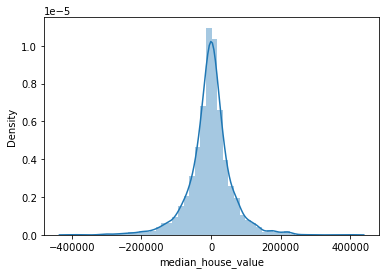

In [35]:
## Distribution plot between our label  and predicted values:
# checking difference between label and predicted label
sns.distplot(housing_labels_t-prediction)

#### We can't get any conclusion about our model accrording the bell shape. Bell curve only tell us the range of predicted values are with in the same range as our original data range values are.

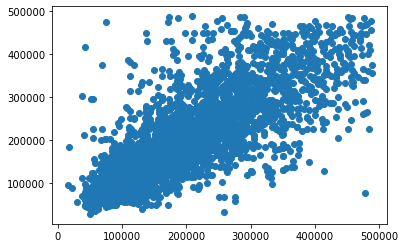

In [36]:
#...> checking predicted lables and our labeles using a scatter plot
plt.scatter(housing_labels_t, prediction)

## <center> Hyper Parameter tuning

In [37]:
#....> Hyper parameters range intialization for tuning 
#....> Gridsearch to find the best parameters for our decision tree model.
    
params = {"criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }    
    
#....> calculating different regression metrics
tuning_dtr = GridSearchCV(dtr, param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=3, n_jobs=-1)

In [38]:
%%time   
tuning_dtr.fit(housing, housing_labels)  #....> Fiting the tuned model on the traning set 


Fitting 3 folds for each of 162 candidates, totalling 486 fits
CPU times: user 1.06 s, sys: 116 ms, total: 1.17 s
Wall time: 2min 24s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             scoring='neg_mean_squared_error', verbose=3)

In [39]:
tuning_dtr.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [40]:
tuning_dtr.best_score_

-3023806701.86499

In [41]:
tuning_dtr.best_estimator_


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10)

In [42]:
%%time
tuned_pred = tuning_dtr.best_estimator_.predict(housing_t) #....> Applying it on the testing set (tuned version)

CPU times: user 4.32 ms, sys: 16 µs, total: 4.33 ms
Wall time: 3.6 ms


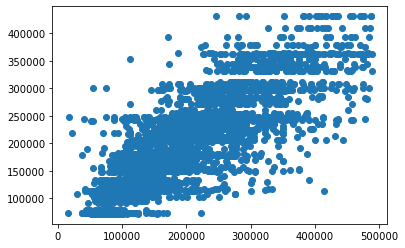

In [43]:
#....> checking predicted lables (tuned version) and our labeles using a scatter plot
plt.scatter(housing_labels_t,tuned_pred)

In [44]:
print('MAE:', metrics.mean_absolute_error(housing_labels_t,tuned_pred))
print('MSE:', metrics.mean_squared_error(housing_labels_t, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(housing_labels_t, tuned_pred)))
print("R^2 score for Testing set: ", r2_score(housing_labels_t,tuned_pred))

MAE: 38900.845859835325
MSE: 2942455677.2922716
RMSE: 54244.40687566112
R^2 score for Testing set:  0.6853400622911546


In [45]:
#....> Finiding feature importances
features=housing_t.columns
importances=tuning_dtr.best_estimator_.feature_importances_
combined=pd.Series(importances, features)
combined

longitude                   0.037974
latitude                    0.035107
housing_median_age          0.023618
total_rooms                 0.003517
total_bedrooms              0.002498
population                  0.000000
households                  0.000000
median_income               0.542211
ocean_proximity             0.225042
rooms_per_household         0.003273
bedrooms_per_room           0.006732
population_per_household    0.120028
dtype: float64

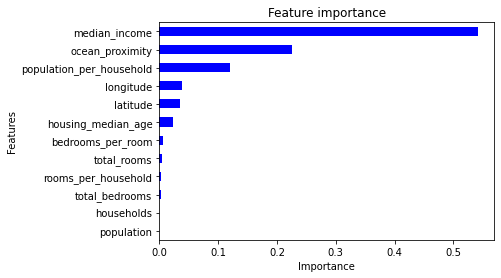

In [46]:
#....> Ploting feature importances
from matplotlib.pyplot import figure
figure()
combined.sort_values().plot.barh(color="b")
plt.title("Feature importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



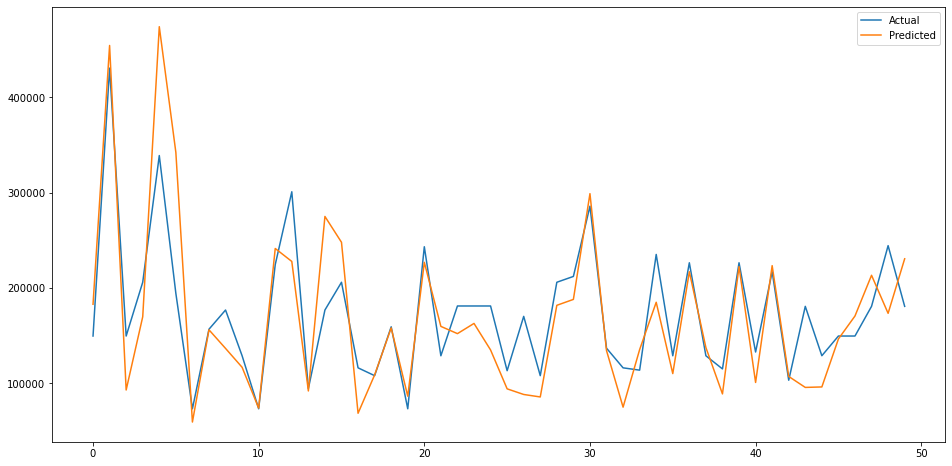

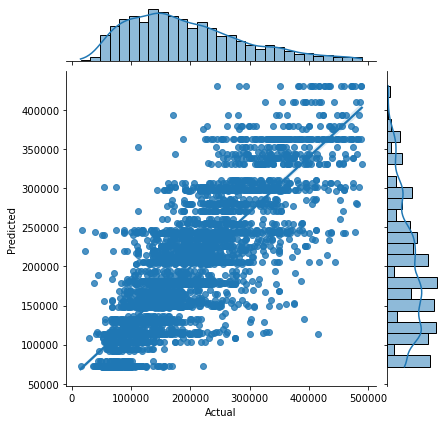

[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40;, score=-5159205761.598 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=40;, score=-5070485134.832 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40;, score=-5135116062.070 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=10;, score=-5159205761.598 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10;, score=-5070485134.832 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20;, score=-5070485134.832 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100,

[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10;, score=-5070485134.832 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20;, score=-5070485134.832 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40;, score=-5070485134.832 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20;, score=-5135116062.070 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20;, score=-5070485134.832 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10;, score=-4811871903.511 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=6, max_leaf_nodes

[CV 2/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40;, score=-5135116062.070 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10;, score=-5159205761.598 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10;, score=-5070485134.832 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=20;, score=-5135116062.070 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40;, score=-5159205761.598 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20;, score=-5159205761.598 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=6, max_leaf_nodes=5, 

[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20;, score=-5159205761.598 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40;, score=-5070485134.832 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=10;, score=-5135116062.070 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20;, score=-5159205761.598 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40;, score=-5159205761.598 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10;, score=-5070485134.832 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=2, max_leaf_nodes=1

In [47]:
#....> Ploting the results
test = pd.DataFrame({'Predicted':tuned_pred,'Actual':housing_labels_t})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")
